# Working with Time Series using Pandas

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Datetime Module

- The datetime module in Python supplies classes for manipulating dates and times

In [2]:
# Current date
today = datetime.date.today()
print("Today's date:", today)

Today's date: 2024-08-08


In [4]:
# Get the current date and time
now = datetime.datetime.now()

# Extract the time part
time_now = now.time()

print("Current DateAndTime:", now)

print("Current time:", time_now)

#Hrs:min:seconds

Current DateAndTime: 2024-08-08 16:21:26.008968
Current time: 16:21:26.008968


`The datetime.datetime(2000, 1, 1)` creates a datetime object representing **January 1, 2000, at midnight (00:00:00).** 
- By default, if the time components (hour, minute, second, microsecond) are not provided, they are set to 0.

In [9]:
date_obj=datetime.datetime(2000, 1, 1)
year = date_obj.year
month = date_obj.month
day = date_obj.day

print("Datetime object:", date_obj)
print("Year:", year)
print("Month:", month)
print("Day:", day)
print("Hour:", date_obj.hour)

Datetime object: 2000-01-01 00:00:00
Year: 2000
Month: 1
Day: 1
Hour: 0


In [10]:
time_obj = datetime.time(14, 30, 45, 123456) # H:M:S:MS
print("Time object:", time_obj)

Time object: 14:30:45.123456


In [11]:
print("Hour:", time_obj.hour)
print("Minute:", time_obj.minute)
print("Second:", time_obj.second)
print("Microsecond:", time_obj.microsecond)


Hour: 14
Minute: 30
Second: 45
Microsecond: 123456


- Creating a datetime object for January 1, 2000, at 15:30:45

In [12]:
dt = datetime.datetime(2000, 1, 1, 15, 30, 45)
print("Datetime object:", dt)

Datetime object: 2000-01-01 15:30:45


- The `datetime.datetime.strptime` method is used to create a datetime object from a string, using a specified format to -   parse the date and time components from the string.
- The format `"%Y/%m/%d"` specifies how to interpret the string:
- `%Y` corresponds to the year (2000).
- `%m` corresponds to the month (12).
- `%d` corresponds to the day (1).


In [5]:
datetime.datetime.strptime("24/12/1", "%y/%m/%d")

datetime.datetime(2024, 12, 1, 0, 0)

The expression `datetime.datetime(2000, 1, 1, 0, 0).strftime("%Y.%m.%d")` creates a `datetime` object
representing January 1, 2000, at midnight (00:00) and then formats it as a string using the specified format `"%Y.%m.%d"`.

- `datetime.datetime(2000, 1, 1, 0, 0)` creates a `datetime` object for the date January 1, 2000, at 00:00 (midnight).
- The `strftime` method is used to format the `datetime` object as a string.
- The format `"%Y.%m.%d"` specifies how to format the date:
  - `%Y` corresponds to the year (2000).
  - `%m` corresponds to the month (01).
  - `%d` corresponds to the day (01).

So, `datetime.datetime(2000, 1, 1, 0, 0).strftime("%Y.%m.%d")` will output the string `2000.01.01`.


In [13]:
datetime.datetime(2024, 1, 1, 0, 0).strftime("%y.%m.%d")

'24.01.01'

## Pandas for Time Series

### Common Date and Time Format Strings

When using `pd.to_datetime`, you can specify the format of your date strings using the `format` parameter. Here are some common format strings:

- `%d`: Day of the month as a zero-padded decimal number (01-31)
- `%m`: Month as a zero-padded decimal number (01-12)
- `%Y`: Year with century as a decimal number (e.g., 2024)
- `%y`: Year without century as a zero-padded decimal number (00-99)
- `%H`: Hour (24-hour clock) as a zero-padded decimal number (00-23)
- `%I`: Hour (12-hour clock) as a zero-padded decimal number (01-12)
- `%p`: AM or PM designation
- `%M`: Minute as a zero-padded decimal number (00-59)
- `%S`: Second as a zero-padded decimal number (00-59)
- `%f`: Microsecond as a decimal number, zero-padded on the left (000000-999999)
- `%z`: UTC offset in the form ±HHMM[SS] (e.g., +0000, -0400, +1030)
- `%Z`: Time zone name
- `%j`: Day of the year as a zero-padded decimal number (001-366)
- `%U`: Week number of the year (Sunday as the first day of the week) as a zero-padded decimal number (00-53)
- `%W`: Week number of the year (Monday as the first day of the week) as a zero-padded decimal number (00-53)
- `%c`: Locale’s appropriate date and time representation
- `%x`: Locale’s appropriate date representation
- `%X`: Locale’s appropriate time representation

### Examples

- `'%d.%m.%Y'`: `13.08.2000` (day.month.year)
- `'%Y-%m-%d'`: `2000-08-13` (year-month-day)
- `'%d/%m/%Y'`: `13/08/2000` (day/month/year)
- `'%m/%d/%Y'`: `08/13/2000` (month/day/year)
- `'%B %d, %Y'`: `August 13, 2000` (full month name day, year)
- `'%d-%b-%Y'`: `13-Aug-2000` (day-abbreviated month name-year)
- `'%I:%M %p'`: `02:30 PM` (hour:minute AM/PM)
- `'%H:%M:%S'`: `14:30:00` (24-hour clock hour:minute:second)

Using these format strings, you can accurately parse and format dates and times in your data.


In [14]:
pd.to_datetime("13.08.2000", format = '%d.%m.%Y') 

Timestamp('2000-08-13 00:00:00')

In [15]:
pd.to_datetime("13/8/2000")

Timestamp('2000-08-13 00:00:00')

In [16]:
date = pd.to_datetime("13.08.2000", format='%d.%m.%Y')
formatted_date = date.strftime("%d %b %Y")
print(formatted_date)

13 Aug 2000


In [17]:
date = pd.to_datetime("13.08.68", format='%d.%m.%y')
formatted_date = date.strftime("%d.%m.%Y")
print(formatted_date)


13.08.2068


## Pandas Timestamp object

Timestamp objects can be seen as Pandas' version of datetime objects and indeed, the Timestamp class is a subclass of datetime Which means they can be used interchangeably in many cases:

### `pd.to_datetime` with Numeric Input

When a number is passed to `pd.to_datetime`, it is interpreted as a timestamp. By default, pandas treats the number as milliseconds since the Unix epoch (January 1, 1970). You can also specify the unit of the timestamp using the `unit` parameter to indicate whether the number represents seconds, milliseconds, microseconds, or nanoseconds since the epoch.

#### Example

```python
import pandas as pd

# Convert a numeric timestamp to datetime (default is milliseconds)
timestamp_in_milliseconds = 1625097600000
date_obj = pd.to_datetime(timestamp_in_milliseconds)
print("Datetime object from milliseconds:", date_obj)

# Convert a numeric timestamp to datetime (specifying unit as seconds)
timestamp_in_seconds = 1625097600
date_obj_seconds = pd.to_datetime(timestamp_in_seconds, unit='s')
print("Datetime object from seconds:", date_obj_seconds)


In [23]:
ts = pd.to_datetime(946684800000000000) 

In [24]:
ts

Timestamp('2000-01-01 00:00:00')

In [ ]:
#Timestamp('2000-01-01 00:00:00')- Number of days from Jan 01 1970 

In [12]:
ts=pd.to_datetime(6000)
ts

Timestamp('1970-01-01 00:00:00.000006')

In [20]:
x=6000/1000
y=x/1000
z=y/1000
z

6e-06

### Time Conversion Explanation

To understand the conversion of the timestamp `946,684,800,000,000,000` nanoseconds into a date, let's break it down step by step:

- 946,684,800,000,000,000 nanoseconds = 946,684,800,000,000 microseconds = 946,684,800,000 milliseconds = 946,684,800 seconds.

#### Converting Nanoseconds to Seconds

- **Nanoseconds to Microseconds**: $946,684,800,000,000,000 \div 1,000 = 946,684,800,000,000$
- **Microseconds to Milliseconds**: $946,684,800,000,000 \div 1,000 = 946,684,800,000$
- **Milliseconds to Seconds**: $946,684,800,000 \div 1,000 = 946,684,800$

Thus, $946,684,800,000,000,000$ nanoseconds = $946,684,800$ seconds.

#### Converting Seconds to Minutes

- **Seconds to Minutes**: $946,684,800 \div 60 = 15,778,080$

Thus, $946,684,800$ seconds = $15,778,080$ minutes.

#### Converting Minutes to Hours

- **Minutes to Hours**: $15,778,080 \div 60 = 262,968$

Thus, $15,778,080$ minutes = $262,968$ hours.

#### Converting Hours to Days

- **Hours to Days**: $262,968 \div 24 = 10,957$

Thus, $262,968$ hours = $10,957$ days.

#### Calculating the Date

- 10,957 days from January 1, 1970, corresponds to January 1, 2000.

This means that the timestamp `946,684,800,000,000,000` nanoseconds represents the date January 1, 2000.


In [25]:
ts.year

2000

In [26]:
ts.month

1

In [11]:
ts.year, ts.month, ts.day, ts.weekday()

(2000, 1, 1, 5)

### Understanding `ts.weekday()`

The `ts.weekday()` method is used to get the day of the week from a pandas `Timestamp` object. The day of the week is returned as an integer, where:

- Monday = 0
- Tuesday = 1
- Wednesday = 2
- Thursday = 3
- Friday = 4
- Saturday = 5
- Sunday = 6



Timestamp objects are an important part of time series capabilities of Pandas, since timestamps are the building block of DateTimeIndex objects:

### `pd.Timestamp`

The `pd.Timestamp` class in pandas is used to represent a single timestamp, which includes both date and time information. It is a more powerful version of Python's built-in `datetime` object, designed to work seamlessly with pandas data structures like Series and DataFrame.



In [35]:
# Create a Timestamp object
ts = pd.Timestamp('2000-01-01 12:30:45')
print(type(ts))
# Access attributes
print("Year:", ts.year)
print("Month:", ts.month)
print("Day:", ts.day)
print("Hour:", ts.hour)
print("Minute:", ts.minute)
print("Second:", ts.second)

# Use methods
print("Day of the week:", ts.weekday())

print("ISO format:", ts.isoformat())  #Returns the timestamp as an ISO 8601 formatted string YYYY-MM-DDTHH:MM:SS

print("Formatted string:", ts.strftime('%Y/%m/%d %H:%M:%S')) #Returns the timestamp as a string formatted according to the specified format


<class 'pandas._libs.tslibs.timestamps.Timestamp'>
Year: 2000
Month: 1
Day: 1
Hour: 12
Minute: 30
Second: 45
Day of the week: 5
ISO format: 2000-01-01T12:30:45
Formatted string: 2000/01/01 12:30:45


In [37]:
index = [pd.Timestamp("2000-01-01"), #epresenting the date January 1, 2000, at midnight (00:00:00).
 pd.Timestamp("2000-01-02"),
 pd.Timestamp("2000-01-03")]

ts = pd.Series(np.random.randn(len(index)), index=index)
ts

2000-01-01    2.675063
2000-01-02   -0.739777
2000-01-03    0.913508
dtype: float64

In [38]:
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq=None)

There are a few things to note here: We create a list of timestamp objects and pass
it to the series constructor as index. This list of timestamps gets converted into a
DatetimeIndex on the fly. If we had passed only the date strings, we would not
get a DatetimeIndex, just an index:

In [39]:
ts = pd.Series(np.random.randn(len(index)), index=[
 "2000-01-01", "2000-01-02", "2000-01-03"])

In [40]:
ts

2000-01-01   -0.781171
2000-01-02    0.418945
2000-01-03   -0.171086
dtype: float64

In [41]:
ts.index

Index(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='object')

However, the to_datetime function is flexible enough to be of help, if all we have
is a list of date strings:

In [43]:
index = pd.to_datetime(["2000-01-01", "2000-01-02", "2000-01-03"])
ts = pd.Series(np.random.randn(len(index)), index=index)
ts.index

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-03'], dtype='datetime64[ns]', freq=None)

## Generate sequences of time stamps of fixed intervals

With to_datetime we are able to convert a variety of strings and even lists of strings
into timestamp or DatetimeIndex objects. Sometimes we are not explicitly given all
the information about a series and we have to generate sequences of time stamps of
fixed intervals ourselves.
Pandas offer another great utility function for this task: date_range.

The date_range function helps to generate a fixed frequency datetime index
between start and end dates. It is also possible to specify either the start or end date
and the number of timestamps to generate.

The frequency can be specified by the freq parameter, which supports a number of
offsets. You can use typical time intervals like hours, minutes, and seconds:


### Frequency Aliases and Full Forms

| Alias | Full Form                 | Description                                              |
|-------|---------------------------|----------------------------------------------------------|
| `B`   | Business day              | Every weekday                                           |
| `C`   | Custom business day       | Every custom business day (e.g., specific weekdays)     |
| `D`   | Calendar day              | Every day                                               |
| `W`   | Weekly                    | Every week                                              |
| `M`   | Month end                 | End of the month                                        |
| `SM`  | Semi-month end            | 15th and end of the month                               |
| `BM`  | Business month end        | Last business day of the month                          |
| `CBM` | Custom business month end | Last custom business day of the month                   |
| `MS`  | Month start               | Start of the month                                      |
| `SMS` | Semi-month start          | 1st and 15th of the month                               |
| `BMS` | Business month start      | First business day of the month                         |
| `CBMS`| Custom business month start | First custom business day of the month                 |
| `Q`   | Quarter end               | End of the quarter                                      |
| `BQ`  | Business quarter end      | Last business day of the quarter                        |
| `QS`  | Quarter start             | Start of the quarter                                    |
| `BQS` | Business quarter start    | First business day of the quarter                       |
| `A`   | Year end                  | End of the year                                         |
| `BA`  | Business year end         | Last business day of the year                           |
| `AS`  | Year start                | Start of the year                                       |
| `BAS` | Business year start       | First business day of the year                          |
| `H`   | Hourly                    | Every hour                                              |
| `T` or `min` | Minutely           | Every minute                                            |
| `S`   | Secondly                  | Every second                                            |
| `L` or `ms` | Millisecond         | Every millisecond                                       |
| `U` or `us` | Microsecond         | Every microsecond                                       |
| `N`   | Nanosecond                | Every nanosecond                                        |


In [45]:
pd.date_range(start="2000-01-01", periods=5, freq='H')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:00:00',
               '2000-01-01 02:00:00', '2000-01-01 03:00:00',
               '2000-01-01 04:00:00'],
              dtype='datetime64[ns]', freq='H')

In [46]:
pd.date_range(start="2000-01-01", periods=5, freq='T') # T means miniute

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:01:00',
               '2000-01-01 00:02:00', '2000-01-01 00:03:00',
               '2000-01-01 00:04:00'],
              dtype='datetime64[ns]', freq='T')

In [47]:
 pd.date_range(start="2000-01-01", periods=5, freq='S')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 00:00:01',
               '2000-01-01 00:00:02', '2000-01-01 00:00:03',
               '2000-01-01 00:00:04'],
              dtype='datetime64[ns]', freq='S')

The freq attribute allows us to specify a multitude of options. Pandas has been
used successfully in finance and economics, not least because it is really simple to
work with business dates as well. As an example, to get an index with the first three
business days of the millennium, the B offset alias can be used:

In [49]:
pd.date_range(start="2000-01-01", periods=7, freq='B')

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11'],
              dtype='datetime64[ns]', freq='B')

The table at the link shows the available offset aliases and can be also be looked up
in the Pandas documentation on time series under https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html

Moreover, The offset aliases can be used in combination as well. Here, we are
generating a datetime index with five elements, each one day, one hour, one minute
and one second apart:

In [50]:
pd.date_range(start="2000-01-01", periods=5, freq='1D1h1min10s')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-02 01:01:10',
               '2000-01-03 02:02:20', '2000-01-04 03:03:30',
               '2000-01-05 04:04:40'],
              dtype='datetime64[ns]', freq='90070S')

Some frequencies allow us to specify an anchoring suffix, which allows us to express
intervals, such as every Friday or every second Tuesday of the month:

In [51]:
pd.date_range(start="2000-01-01", periods=5, freq='W-FRI')

DatetimeIndex(['2000-01-07', '2000-01-14', '2000-01-21', '2000-01-28',
               '2000-02-04'],
              dtype='datetime64[ns]', freq='W-FRI')

In [24]:
pd.date_range(start="2000-01-01", periods=5, freq='WOM-2TUE') 
#WOM: Week of Month
#2: Second occurrence in the month
#TUE: Day of the week (Tuesday)

DatetimeIndex(['2000-01-11', '2000-02-08', '2000-03-14', '2000-04-11',
               '2000-05-09'],
              dtype='datetime64[ns]', freq='WOM-2TUE')

Finally, we can merge various indexes of different frequencies. The possibilities
are endless. We only show one example, where we combine two indexes – each over
a decade – one pointing to every first business day of a year and one to the last day
of February:

In [25]:
s = pd.date_range(start="2000-01-01", periods=10, freq='BAS-JAN')
t = pd.date_range(start="2000-01-01", periods=10, freq='A-FEB')
s.union(t)

DatetimeIndex(['2000-01-03', '2000-02-29', '2001-01-01', '2001-02-28',
               '2002-01-01', '2002-02-28', '2003-01-01', '2003-02-28',
               '2004-01-01', '2004-02-29', '2005-01-03', '2005-02-28',
               '2006-01-02', '2006-02-28', '2007-01-01', '2007-02-28',
               '2008-01-01', '2008-02-29', '2009-01-01', '2009-02-28'],
              dtype='datetime64[ns]', freq=None)

### Custom Frequencies in `pd.date_range`

Pandas' `pd.date_range` function supports custom frequencies for generating date ranges that follow specific patterns. Here we explain two custom frequencies: `freq='BAS-JAN'` and `freq='A-FEB'`.

#### `freq='BAS-JAN'`

- **BAS**: Business Year Start
- **JAN**: January

The `freq='BAS-JAN'` parameter generates dates corresponding to the first business day of January each year.

####  `freq='A-FEB'`
- **A**: Year End
- **FEB**: February
- The freq='A-FEB' parameter generates dates corresponding to the last day of February each year, effectively treating February as the end of the year.

We see, that 2000 and 2005 did not start on a weekday and that 2000, 2004, and 2008
were the leap years.

## Simple Plotting and slicing dicing of time series

We have seen two powerful functions so far, to_datetime and date_range. Now
we want to dive into time series by first showing how you can create and plot time
series data with only a few lines. In the rest of this section, we will show various
ways to access and slice time series data.

2000-01-03    -0.154280
2000-01-04    -0.061774
2000-01-05     0.633168
2000-01-06     1.818689
2000-01-07     3.071092
                ...    
2000-10-02    13.001073
2000-10-03    11.705327
2000-10-04    12.059189
2000-10-05    11.424757
2000-10-06    12.171604
Freq: B, Length: 200, dtype: float64

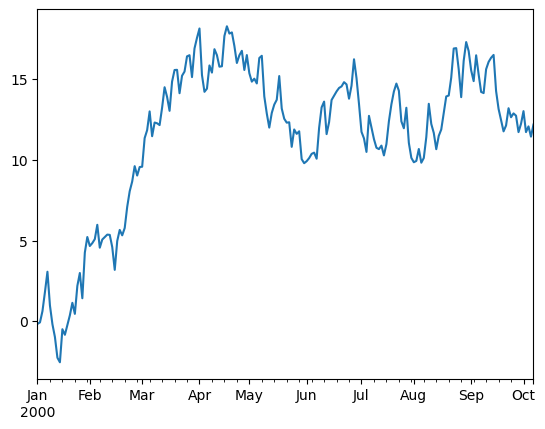

In [28]:
index = pd.date_range(start='2000-01-01', periods=200, freq='B')
ts = pd.Series(np.random.randn(len(index)), index=index)
walk = ts.cumsum()
walk.plot()
walk

Just as with usual series objects, you can select parts and slice the index:

In [27]:
ts.head()

2000-01-03   -0.469874
2000-01-04   -0.164873
2000-01-05    0.688583
2000-01-06   -0.811420
2000-01-07   -0.796378
Freq: B, dtype: float64

In [28]:
ts[0]

-0.4698743466089746

We can use date strings as keys, even though our series has a DatetimeIndex:

In [29]:
ts['2000-01-03']

-0.4698743466089746

Even though the DatetimeIndex is made of timestamp objects, we can use datetime
objects as keys as well:

In [30]:
ts[datetime.datetime(2000, 1, 3)]

-0.4698743466089746

Access is similar to lookup in dictionaries or lists, but more powerful. We can, for
example, slice with strings or even mixed objects:

In [31]:
ts['2000-01-03':'2000-01-05']

2000-01-03   -0.469874
2000-01-04   -0.164873
2000-01-05    0.688583
Freq: B, dtype: float64

In [32]:
ts['2000-01-03':datetime.datetime(2000, 1, 5)]

2000-01-03   -0.469874
2000-01-04   -0.164873
2000-01-05    0.688583
Freq: B, dtype: float64

It is even possible to use partial strings to select groups of entries. If we are only
interested in February, we could simply write:

In [33]:
ts['2000-02']

2000-02-01    3.028084
2000-02-02    0.019986
2000-02-03   -0.808941
2000-02-04   -0.719256
2000-02-07   -1.680814
2000-02-08    1.022560
2000-02-09    1.864631
2000-02-10    1.016845
2000-02-11   -0.033032
2000-02-14   -0.981384
2000-02-15    1.071376
2000-02-16   -1.113909
2000-02-17    0.281303
2000-02-18   -0.265361
2000-02-21   -0.796356
2000-02-22   -0.338314
2000-02-23    0.951799
2000-02-24   -1.579085
2000-02-25    1.072497
2000-02-28    1.083813
2000-02-29   -0.620416
Freq: B, dtype: float64

To see all entries from March until May, including:

In [34]:
ts['2000-03':'2000-05']

2000-03-01   -0.220147
2000-03-02    0.135613
2000-03-03    1.981791
2000-03-06    0.475340
2000-03-07   -0.134205
                ...   
2000-05-25   -0.882115
2000-05-26    0.938742
2000-05-29    0.233536
2000-05-30    0.367333
2000-05-31    0.112955
Freq: B, Length: 66, dtype: float64

Time series can be shifted forward or backward in time. The index stays in place,
the values move:

In [35]:
small_ts = ts['2000-02-01':'2000-02-05']
small_ts

2000-02-01    3.028084
2000-02-02    0.019986
2000-02-03   -0.808941
2000-02-04   -0.719256
Freq: B, dtype: float64

In [36]:
small_ts.shift(2)

2000-02-01         NaN
2000-02-02         NaN
2000-02-03    3.028084
2000-02-04    0.019986
Freq: B, dtype: float64

In [37]:
small_ts.shift(-2)

2000-02-01   -0.808941
2000-02-02   -0.719256
2000-02-03         NaN
2000-02-04         NaN
Freq: B, dtype: float64

# Passenger Count Case Study

JetRail is a new form of transportation. JetRail uses Jet propulsion technology to run rails and move people at a high speed! You are provided with traffic data of JetRail since inception. In order to efficiently manage the business and manpower for the coming months, it is crucial to estimate the expected traffic on JetRail. Your task is to use this data and forecast the traffic on JetRail for the next 7 months.
 

**Data Description**
- Date: Store the date when the observation was taken
- Count: Holds the number passengers for the given date

In [52]:
df = pd.read_csv("AirPassenger.csv")
df.head()

,Year-Month,Pax
0,1949-Jan,112
1,1949-Feb,118
2,1949-Mar,132
3,1949-Apr,129
4,1949-May,121


In [41]:
df.dtypes

Year-Month    object
Pax            int64
dtype: object

In [53]:
df = pd.read_csv("AirPassenger.csv",parse_dates=["Year-Month"])
df.head()

,Year-Month,Pax
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [54]:
df.dtypes

Year-Month    datetime64[ns]
Pax                    int64
dtype: object

In [55]:
df = df.set_index(df['Year-Month'])
df

,Year-Month,Pax
Year-Month,,
1949-01-01,1949-01-01,112
1949-02-01,1949-02-01,118
1949-03-01,1949-03-01,132
1949-04-01,1949-04-01,129
1949-05-01,1949-05-01,121
...,...,...
1960-08-01,1960-08-01,606
1960-09-01,1960-09-01,508
1960-10-01,1960-10-01,461


In [56]:
df.drop(['Year-Month'],axis = 1,inplace = True)

In [57]:
df.head()

,Pax
Year-Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<Axes: xlabel='Year-Month'>

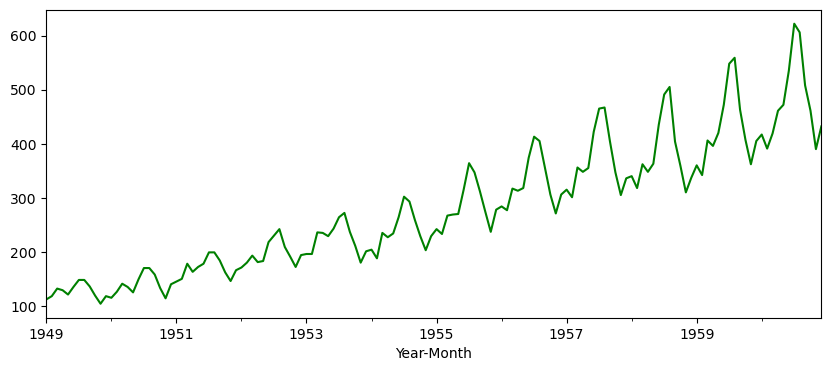

In [60]:
plt.figure(figsize=(10,4))
df['Pax'].plot(color="green")

## Passenger count time series

In [61]:
train = pd.read_csv("train_data.csv", parse_dates=['Date']) #This parameter tells pandas to parse the Date column as dates

In [62]:
print(train.dtypes)

Date     datetime64[ns]
count             int64
dtype: object


In [63]:
train.head()

,Date,count
0,2012-08-25,3
1,2012-08-26,3
2,2012-08-27,2
3,2012-08-28,2
4,2012-08-29,2


### Set the index to be datetime

In [64]:
#train = train.set_index(pd.DatetimeIndex(train['Date']))

In [74]:
train = train.set_index((train['Date']))

KeyError: 'Date'

In [ ]:
train

In [ ]:
train.drop(['Date'],axis = 1,inplace = True)

In [ ]:
train.head()

<Axes: xlabel='Date'>

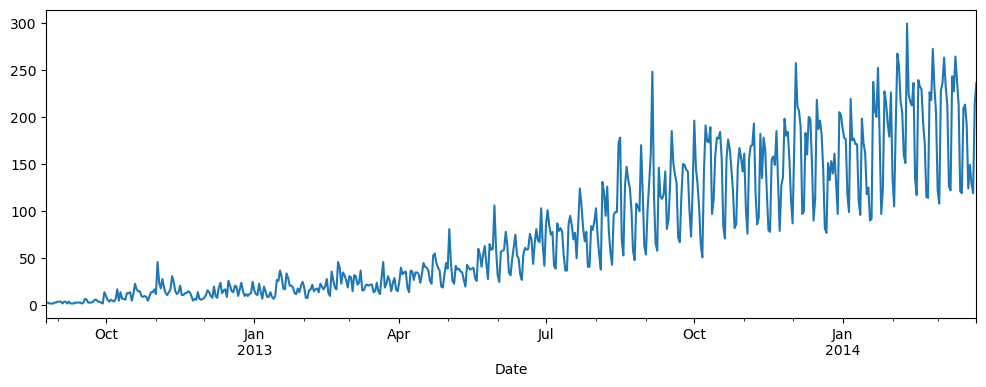

In [75]:
plt.figure(figsize=(12,4))
train['count'].plot()

# Resampling

- We have data at daily level

In [76]:
# downsampling
weekly_data = train.resample('W').mean()

we can downsample this time series to larger
intervals, for example, weeks. We can choose an aggregation function as well.
The default aggregation is to take all the values and calculate the mean:

In [77]:
# plotting
print(weekly_data.shape)
weekly_data.head()

(84, 1)


,count
Date,
2012-08-26,3.000000
2012-09-02,2.857143
2012-09-09,3.142857
2012-09-16,2.571429
2012-09-23,4.142857


<Axes: xlabel='Date'>

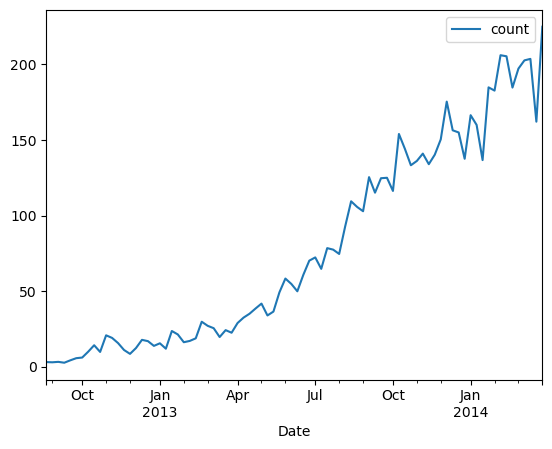

In [78]:
weekly_data.plot()

Similarly we can upsample and forward fill or apply a custom function as well to fill the values

In [79]:
train.head(20)

,count
Date,
2012-08-25,3
2012-08-26,3
2012-08-27,2
2012-08-28,2
2012-08-29,2
2012-08-30,3
2012-08-31,3
2012-09-01,4
2012-09-02,4


In [80]:
train.resample('H').ffill().head()

,count
Date,
2012-08-25 00:00:00,3
2012-08-25 01:00:00,3
2012-08-25 02:00:00,3
2012-08-25 03:00:00,3
2012-08-25 04:00:00,3


In [82]:
train.resample('H').interpolate().head(24)

,count
Date,
2012-08-25 00:00:00,3.0
2012-08-25 01:00:00,3.0
2012-08-25 02:00:00,3.0
2012-08-25 03:00:00,3.0
2012-08-25 04:00:00,3.0
2012-08-25 05:00:00,3.0
2012-08-25 06:00:00,3.0
2012-08-25 07:00:00,3.0
2012-08-25 08:00:00,3.0


<Figure size 576x288 with 0 Axes>

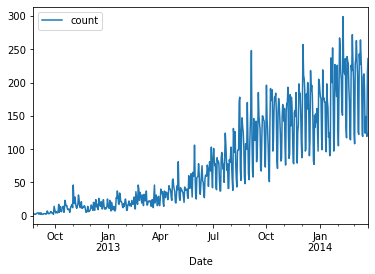

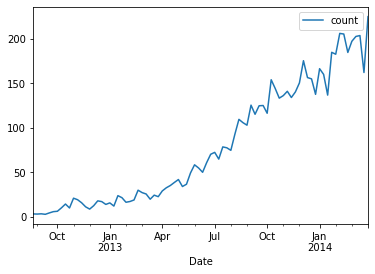

In [48]:
plt.figure(figsize=(8,4))

train.plot()
weekly_data.plot()

## Timezones

### What is a Time Zone?

A **time zone** is a region of the Earth that has the same standard time. Time zones are typically defined by the offset from Coordinated Universal Time (UTC). This offset is expressed as **UTC+** or **UTC-**, indicating the number of hours and minutes that should be added or subtracted from UTC to get the local time.

Each time zone covers a specific area on the Earth’s surface, and the boundaries are usually aligned with the borders of countries, states, or regions. Time zones are crucial for maintaining a consistent time reference, especially as the Earth rotates, causing different parts of the world to experience day and night at different times.

### Common Time Zones and IST Conversion

Here is a list of some common time zones along with their conversion to **Indian Standard Time (IST)**, which is **UTC+5:30**:

| Time Zone | UTC Offset | IST Conversion |
|-----------|------------|----------------|
| UTC       | UTC+0:00   | IST + 5:30 hrs |
| GMT       | UTC+0:00   | IST + 5:30 hrs |
| CET       | UTC+1:00   | IST + 4:30 hrs |
| EET       | UTC+2:00   | IST + 3:30 hrs |
| MSK       | UTC+3:00   | IST + 2:30 hrs |
| IST (Israel) | UTC+2:00  | IST + 3:30 hrs |
| PST       | UTC-8:00   | IST + 13:30 hrs |
| MST       | UTC-7:00   | IST + 12:30 hrs |
| CST       | UTC-6:00   | IST + 11:30 hrs |
| EST       | UTC-5:00   | IST + 10:30 hrs |
| AST       | UTC-4:00   | IST + 9:30 hrs  |
| JST       | UTC+9:00   | IST - 3:30 hrs |
| AEST      | UTC+10:00  | IST - 4:30 hrs |
| NZST      | UTC+12:00  | IST - 6:30 hrs |

**Note:** The IST conversion indicates how many hours you need to add or subtract from the time zone's UTC offset to get the corresponding time in Indian Standard Time.


# Understanding UTC and IST

**UTC** stands for **Coordinated Universal Time**. It is the primary time standard by which the world regulates clocks and time. UTC is essentially the same as GMT (Greenwich Mean Time), and it does not change with the seasons like some local time zones (e.g., daylight saving time).

## UTC and IST (Indian Standard Time) Example:

- **UTC** is the reference time, and it doesn't change regardless of where you are in the world.
- **IST (Indian Standard Time)** is the time observed in India and is **UTC + 5 hours 30 minutes**.

### Example:

Let's say it's **12:00 noon UTC**.

- To convert this to **IST**, you add **5 hours and 30 minutes**.
- So, **12:00 noon UTC + 5:30 hours = 5:30 PM IST**.

Therefore, when it is **12:00 PM UTC**, it is **5:30 PM in IST**.

This time difference is consistent throughout the year since India does not observe daylight saving time.


In [83]:
t = pd.Timestamp('2000-01-01')

In [50]:
t.tz is None

True

In [51]:
t = pd.Timestamp('2000-01-01', tz='Africa/Johannesburg')

In [52]:
t.tz

<DstTzInfo 'Africa/Johannesburg' SAST+2:00:00 STD>

Check all timezones here: https://en.wikipedia.org/wiki/List_of_tz_database_time_zones

This works for ranges as well:

In [84]:
rng = pd.date_range('1/1/2000 00:00', periods=10, freq='D', tz='Europe/London') #localize the date and time

In [85]:
rng

DatetimeIndex(['2000-01-01 00:00:00+00:00', '2000-01-02 00:00:00+00:00',
               '2000-01-03 00:00:00+00:00', '2000-01-04 00:00:00+00:00',
               '2000-01-05 00:00:00+00:00', '2000-01-06 00:00:00+00:00',
               '2000-01-07 00:00:00+00:00', '2000-01-08 00:00:00+00:00',
               '2000-01-09 00:00:00+00:00', '2000-01-10 00:00:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='D')

Sometimes, you will already have a time zone unaware time series object that you
would like to make time zone aware. The tz_localize function helps to switch
between time zone aware and time zone unaware objects:

In [55]:
rng = pd.date_range('1/1/2000 00:00', periods=10, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts.index.tz is None

True

In [56]:
ts

2000-01-01    1.942734
2000-01-02   -0.207280
2000-01-03    0.366210
2000-01-04   -0.524036
2000-01-05   -2.127423
2000-01-06    0.230820
2000-01-07    0.447178
2000-01-08   -0.400013
2000-01-09    0.136984
2000-01-10    0.646346
Freq: D, dtype: float64

In [86]:
ts_utc = ts.tz_localize('UTC')
ts_utc.index.tz

datetime.timezone.utc

To move a time zone aware object to other time zones, you can use the tz_convert
method:

In [87]:
ts_utc.tz_convert('Europe/Berlin').index.tz

<DstTzInfo 'Europe/Berlin' LMT+0:53:00 STD>

Finally, to detach any time zone information from an object, it is possible to pass
None to either tz_convert or tz_localize:

In [59]:
ts_utc.tz_convert(None).index.tz is None

True

In [88]:
import pytz

# Define time zones
india_tz = pytz.timezone('Asia/Kolkata')
europe_tz = pytz.timezone('Europe/London')
dubai_tz = pytz.timezone('Asia/Dubai')

# Get the current time in UTC
utc_now = datetime.datetime.now(pytz.utc)

# Convert the current UTC time to each time zone
india_time = utc_now.astimezone(india_tz)
europe_time = utc_now.astimezone(europe_tz)
dubai_time = utc_now.astimezone(dubai_tz)

# Print the current time in each time zone
print("Current time in India:", india_time.strftime('%Y-%m-%d %H:%M:%S %Z%z'))
print("Current time in Europe (London):", europe_time.strftime('%Y-%m-%d %H:%M:%S %Z%z'))
print("Current time in Dubai:", dubai_time.strftime('%Y-%m-%d %H:%M:%S %Z%z'))


Current time in India: 2024-08-09 16:18:40 IST+0530
Current time in Europe (London): 2024-08-09 11:48:40 BST+0100
Current time in Dubai: 2024-08-09 14:48:40 +04+0400


## Timedelta

Along with the powerful timestamp object, which acts as a building block for the
DatetimeIndex, there is another useful data structure, which has been introduced
in Pandas 0.15 – the Timedelta. The Timedelta can serve as a basis for indices as well,
in this case a TimedeltaIndex.
Timedeltas are differences in times, expressed in difference units. The Timedelta
class in Pandas is a subclass of datetime.timedelta from the Python standard
library. As with other Pandas data structures, the Timedelta can be constructed from
a variety of inputs:

In [89]:
# Create a Timedelta object representing 1 day
timedelta_one_day = pd.Timedelta('2 days')

# Print the Timedelta object
print("Timedelta:", timedelta_one_day)


Timedelta: 2 days 00:00:00


In [90]:
# Current Timestamp
current_time = pd.Timestamp('2024-07-24 12:00:00')

# Adding Timedelta to Timestamp
new_time = current_time + timedelta_one_day
print("New time (current_time + 2 day):", new_time)


New time (current_time + 2 day): 2024-07-26 12:00:00


In [91]:
# Create a time series
time_series = pd.Series(pd.date_range('2024-07-24', periods=5, freq='D'))

# Shift dates by 1 day using Timedelta
shifted_series = time_series + timedelta_one_day
print("Original time series:")
print(time_series)
print("Shifted time series by 1 day:")
print(shifted_series)


Original time series:
0   2024-07-24
1   2024-07-25
2   2024-07-26
3   2024-07-27
4   2024-07-28
dtype: datetime64[ns]
Shifted time series by 1 day:
0   2024-07-26
1   2024-07-27
2   2024-07-28
3   2024-07-29
4   2024-07-30
dtype: datetime64[ns]


In [92]:
# Create a Timedelta object representing negative 1 day, plus 2 minutes, 10 seconds, and 3 microseconds
timedelta_example = pd.Timedelta('-1 days 2 min 10s 3us')

# Print the Timedelta object
print("Timedelta:", timedelta_example)

# Current Timestamp for demonstration
current_time = pd.Timestamp('2024-07-24 12:00:00')

# Subtracting the Timedelta from the current Timestamp
new_time_subtract = current_time + timedelta_example  # Equivalent to current_time - pd.Timedelta('23:57:49.999997')
print("New time after subtraction (current_time + timedelta_example):", new_time_subtract)

# Adding the absolute value of the Timedelta to the current Timestamp
new_time_add = current_time + abs(timedelta_example)  # This is just for demonstration and not a common use
print("New time after adding absolute Timedelta (current_time + abs(timedelta_example)):", new_time_add)

# Create a DataFrame with a start date column
df = pd.DataFrame({
    'Start_Date': [pd.Timestamp('2024-07-24 12:00:00'), pd.Timestamp('2024-07-25 12:00:00')],
})

# Subtract the Timedelta from the start date to get an end date
df['End_Date'] = df['Start_Date'] + timedelta_example  # Equivalent to Start_Date - pd.Timedelta('23:57:49.999997')
print("DataFrame with End_Date calculated using Timedelta:")
print(df)


Timedelta: -2 days +23:57:49.999997
New time after subtraction (current_time + timedelta_example): 2024-07-23 11:57:49.999997
New time after adding absolute Timedelta (current_time + abs(timedelta_example)): 2024-07-25 12:02:10.000003
DataFrame with End_Date calculated using Timedelta:
           Start_Date                   End_Date
0 2024-07-24 12:00:00 2024-07-23 11:57:49.999997
1 2024-07-25 12:00:00 2024-07-24 11:57:49.999997


In [63]:
pd.Timedelta(days=1,seconds=1)

Timedelta('1 days 00:00:01')

As you would expect, Timedeltas allow basic arithmetic:

In [69]:
pd.Timedelta(days=1) + pd.Timedelta(seconds=60)

Timedelta('1 days 00:01:00')

Similar to to_datetime, there is a to_timedelta function that can parse strings or
lists of strings into Timedelta structures or TimedeltaIndices:

In [66]:
pd.to_timedelta('20.1s')

Timedelta('0 days 00:00:20.100000')

In [44]:
import pandas as pd

# Create a DataFrame with datetime and timedelta
df = pd.DataFrame({
    'Start_Date': [pd.Timestamp('2024-07-24'), pd.Timestamp('2024-07-25')],
    'Duration': [pd.Timedelta(days=2), pd.Timedelta(days=3)]
})

# Calculate end date by adding duration to start date
df['End_Date'] = df['Start_Date'] + df['Duration']
print("DataFrame with Timedelta:")
print(df)


DataFrame with Timedelta:
  Start_Date Duration   End_Date
0 2024-07-24   2 days 2024-07-26
1 2024-07-25   3 days 2024-07-28


In [50]:
import pandas as pd

# Define the starting date (e.g., the first day of the month)
start_date = pd.Timestamp('2024-07-01')

# Create a Timedelta object representing one day
one_day = pd.Timedelta('1 days')

# Initialize an empty list to store odd dates
odd_dates = []

# Iterate through the days of the month
current_date = start_date
while current_date.month == start_date.month:
    # Check if the day is odd
    if current_date.day % 2 != 0:
        odd_dates.append(current_date)
    
    # Move to the next day
    current_date += one_day

# Print the odd dates
for date in odd_dates:
    print(date.strftime('%Y-%m-%d'))


2024-07-01
2024-07-03
2024-07-05
2024-07-07
2024-07-09
2024-07-11
2024-07-13
2024-07-15
2024-07-17
2024-07-19
2024-07-21
2024-07-23
2024-07-25
2024-07-27
2024-07-29
2024-07-31


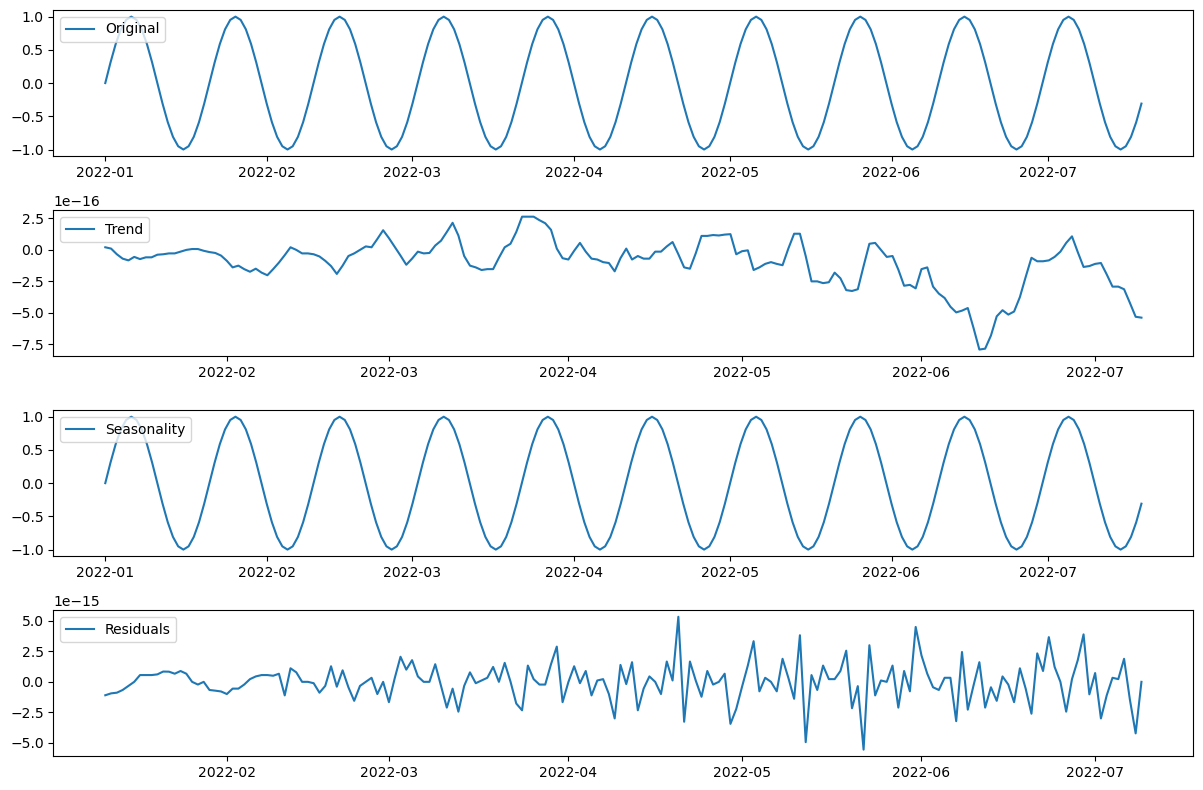

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate a sine wave series
np.random.seed(0)
n_points = 200
time = np.arange(n_points)
sine_series = np.sin(2 * np.pi * time / 20)

# Convert to a pandas Series
sine_series = pd.Series(sine_series, index=pd.date_range(start='2022-01-01', periods=n_points))

# Decompose the series
decomposition = seasonal_decompose(sine_series, model='additive', period=20)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(sine_series, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


## White noise

#### What is White Noise?

white noise refers to a sequence of random variables that are:

- **Uncorrelated**: Each value in the series is not correlated with any other values.
- **Identically Distributed**: Each value comes from the same probability distribution, typically with a mean of zero and a constant variance. Each value of $y_t$ is identically and independently distributed. There is no correlation between any two points in time. This is called white noise.

### Characteristics of White Noise

- **Mean**: The expected value (mean) of white noise is zero.
- **Variance**: The variance is constant over time, meaning the signal's amplitude does not change over time.
- **Autocorrelation**: White noise has no autocorrelation; the correlation between any two values in the series is zero for any lag greater than zero.
- **Stationarity**: White noise is a stationary process, meaning its statistical properties do not change over time.


Let’s generate a time series $y_t$ by taking a random sample from any distribution of our choice (e.g., Normal distribution with zero mean and unit variance aka $N(0,1)$) at each time step $t$.


If we sample from $N(0,1)$ then it is known as Gaussian white noise.

It is common to see this written as: $y_t = \epsilon_t$ where $\epsilon_t \sim N(0,1)$

White noise has no predictive information in past values as there is no correlation at any two points in time.



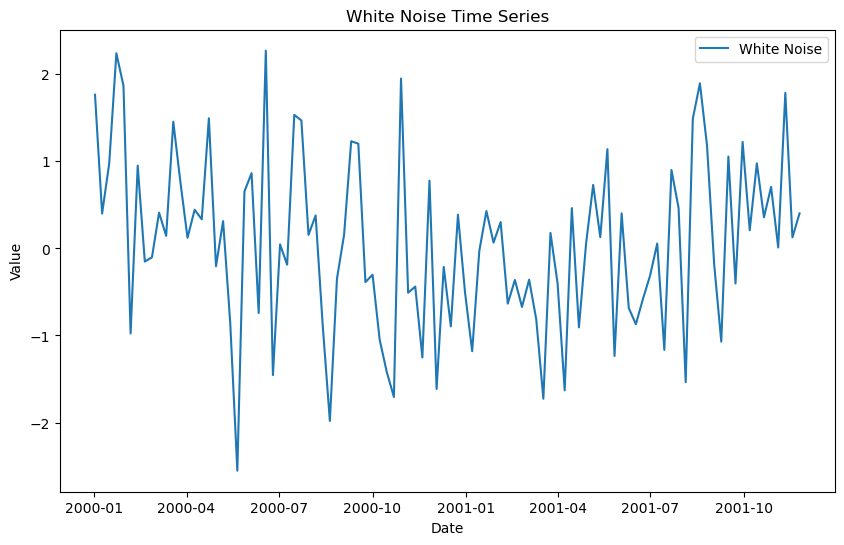

In [53]:
num_timesteps = 100  # Length of time series we want
np.random.seed(0)  # Ensures we generate the same random numbers every time
y = np.random.normal(loc=0, scale=1, size=num_timesteps)
ts = pd.date_range(start='2000-01-01', periods=num_timesteps, freq='W')
df = pd.DataFrame(data={'y': y}, index=ts)
# Plot the time series
plt.figure(figsize=(10, 6))
plt.plot(df, label='White Noise')
plt.title('White Noise Time Series')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

In [57]:
mean = np.mean(y)
var = np.var(y)
print(var)

1.0158266192149312


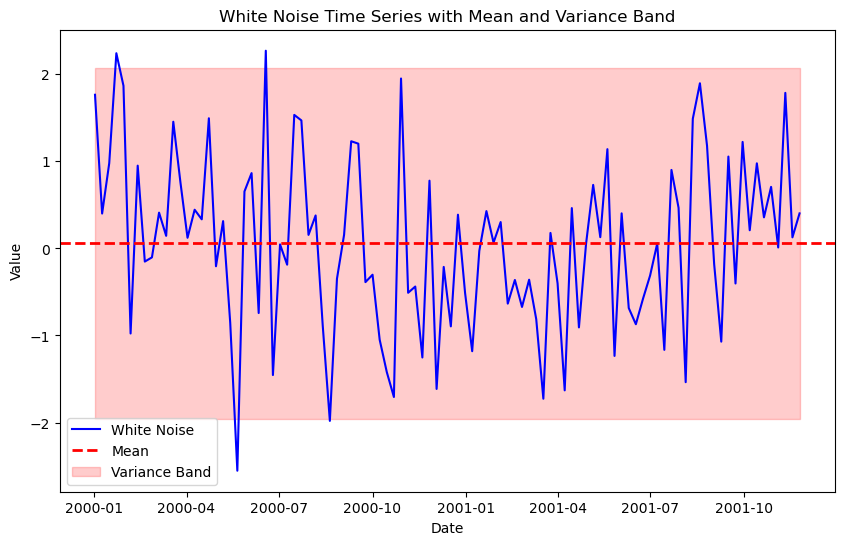

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(df, label='White Noise', color='blue')
plt.axhline(mean, color='red', linestyle='--', linewidth=2, label='Mean')
plt.fill_between(df.index, mean - 2*std, mean + 2*std, color='red', alpha=0.2, label='Variance Band')
plt.title('White Noise Time Series with Mean and Variance Band')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()


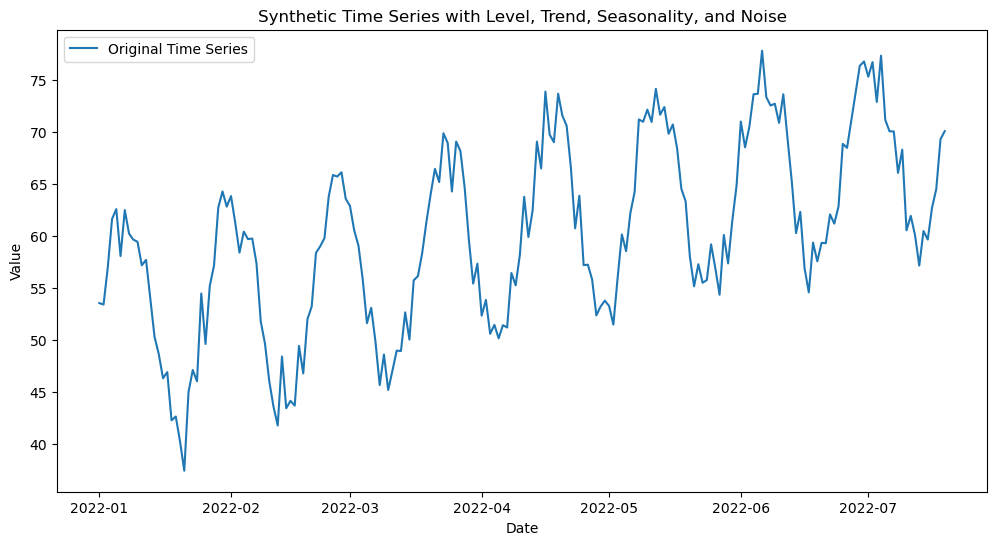

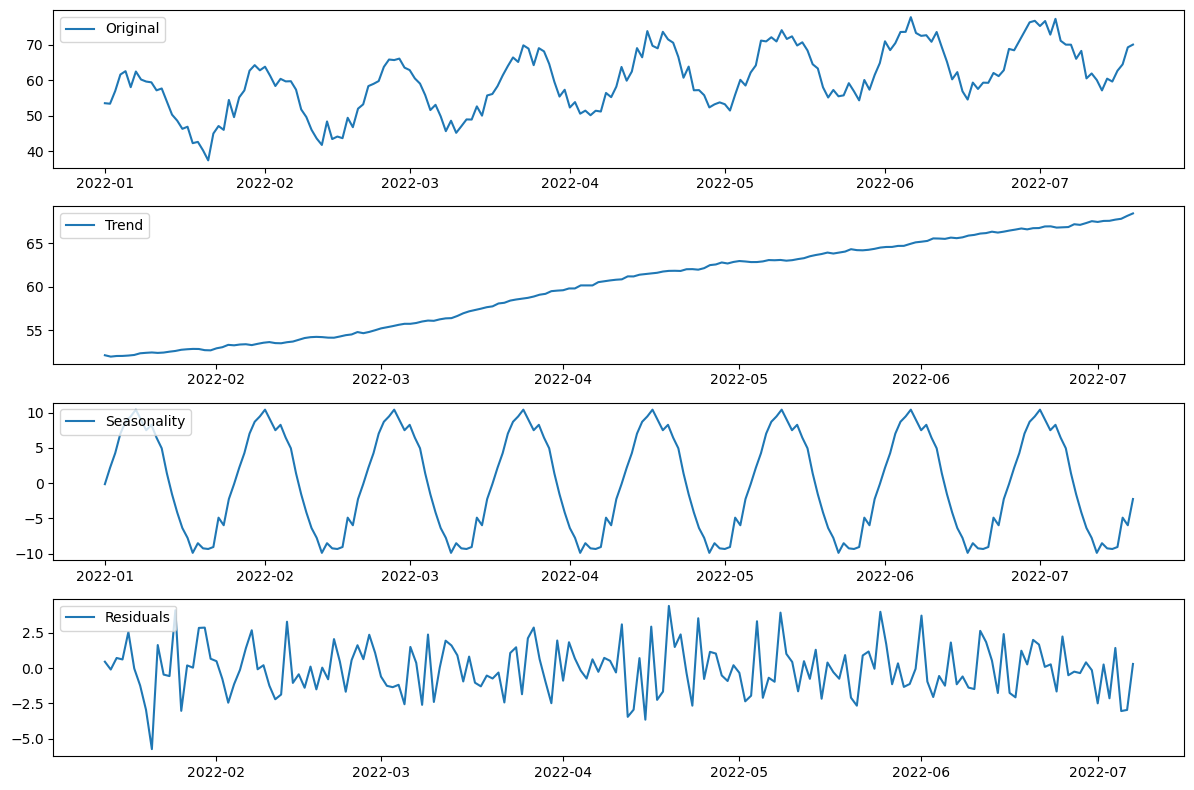

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate synthetic time series data
np.random.seed(0)
num_timesteps = 200
time = np.arange(num_timesteps)

# Level (baseline)
level = 50

# Trend (linear increase)
trend = time * 0.1

# Seasonality (sinusoidal pattern)
seasonality = 10 * np.sin(2 * np.pi * time / 25)

# Noise (random fluctuations)
noise = np.random.normal(loc=0, scale=2, size=num_timesteps)

# Combine all components
time_series = level + trend + seasonality + noise

# Create a pandas Series
ts = pd.date_range(start='2022-01-01', periods=num_timesteps, freq='D')
time_series = pd.Series(time_series, index=ts)

# Plot the original time series
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series')
plt.title('Synthetic Time Series with Level, Trend, Seasonality, and Noise')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# Decompose the time series
decomposition = seasonal_decompose(time_series, model='additive', period=25)

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(time_series, label='Original')
plt.legend(loc='upper left')

plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='upper left')

plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


<Figure size 1000x600 with 0 Axes>

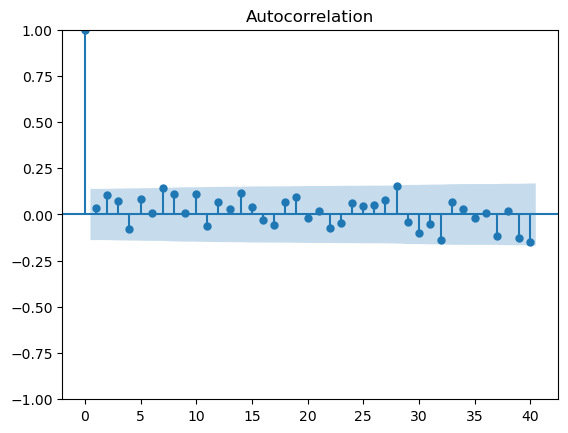

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Generate a synthetic time series data (example)
np.random.seed(0)
num_timesteps = 200
time_series = np.random.normal(size=num_timesteps)

# Plot the autocorrelation function
plt.figure(figsize=(10, 6))
plot_acf(time_series, lags=40)
plt.show()
